In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab


"""
Podamos los grafo que solo tengan grado 1 ya que hemos partido de un influencer 
inicialy podemos sobreentender que todos siguen a ese (de esta manera ahorramos 
recursos facilitando los calculos)
"""
G = nx.read_gml('./grafo_con_poda.gml')

def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    # nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(-xmax, xmax)
    plt.ylim(-ymax, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G,"my_graph.png")

#it can also be saved in .svg, .png. or .ps formats


In [6]:
# SACAMOS EL NODO CON MAYOR GRADO Y EL GRAFO CON MENOR GRADO
sorted(G.degree, key=lambda x: x[1], reverse=True)[0], sorted(G.degree, key=lambda x: x[1], reverse=True)[-1]

(('1740037465761619968', 1292), ('447544736', 2))

In [10]:
sorted(list(nx.find_cliques(G)), key = lambda x: len(x), reverse=True)

[['186912015',
  '1440179839810433027',
  '1166463145675776000',
  '206241888',
  '1072277456093089792',
  '1589600019094568960'],
 ['1166463145675776000',
  '206241888',
  '1072277456093089792',
  '1440179839810433027',
  '564969145',
  '1483544428895739912'],
 ['1687940719896322049',
  '332309033',
  '1358504748505260043',
  '1716756536150704129',
  '1761409012602372096'],
 ['1358504748505260043',
  '332309033',
  '1455285964658597889',
  '1707912390950420480',
  '1716756536150704129'],
 ['1358504748505260043',
  '332309033',
  '1455285964658597889',
  '1707912390950420480',
  '2207026739'],
 ['1358504748505260043',
  '332309033',
  '1761409012602372096',
  '1707912390950420480',
  '1716756536150704129'],
 ['2955413383', '36406585', '148388154', '4318487063', '285764222'],
 ['2955413383',
  '36406585',
  '148388154',
  '1291291379365302273',
  '1346128374897418241'],
 ['2955413383', '36406585', '148388154', '1291291379365302273', '285764222'],
 ['202714633',
  '1440179839810433027',


In [11]:
print(f"Grado medio de la red: {2*G.number_of_edges() / float(G.number_of_nodes()):.4f}")

Grado medio de la red: 5.5852


/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

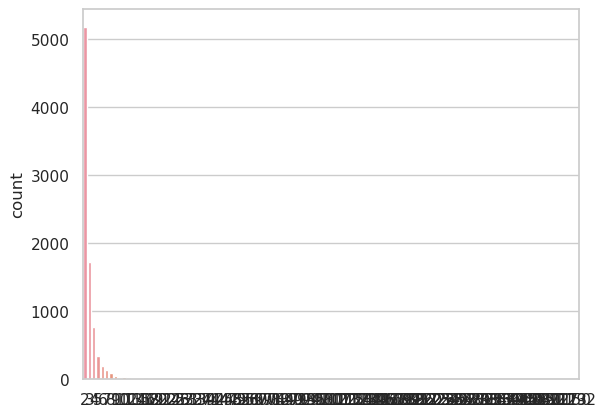

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

grados = [d for n, d in G.degree()]
sns.countplot(x=grados)

<Axes: >

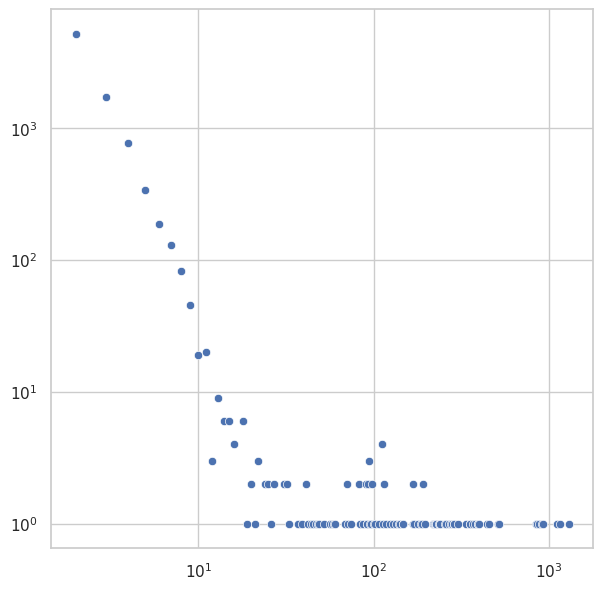

In [13]:
grados_ord = sorted(set(grados))
conteo = [grados.count(g) for g in grados_ord]

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x=grados_ord, y=conteo, ax=ax)

In [14]:
nx.clustering(G)

{'1458165644474687500': 1.0,
 '1461449366468767753': 0,
 '150483748': 0,
 '1360798358730809344': 1.0,
 '1703484508375261184': 0,
 '1627957362953797632': 1.0,
 '1447354999177203712': 0,
 '1635483011067125761': 0.6666666666666666,
 '4172255593': 0,
 '3111276514': 1.0,
 '1619404369568452608': 0.3333333333333333,
 '1590137419537551361': 1.0,
 '1382839652': 0,
 '1709356378249170944': 0,
 '1734169517977198592': 0.2222222222222222,
 '2947272099': 0,
 '973178227689754624': 1.0,
 '1722041740050173952': 0.3333333333333333,
 '1417482892792549376': 0,
 '1325172146465894403': 0,
 '1458640208656801792': 0.6666666666666666,
 '870670655649456129': 1.0,
 '923551883343605763': 0,
 '1626938237892657152': 0.16666666666666666,
 '1745866845805043713': 0.3333333333333333,
 '1773745781037506561': 0.23809523809523808,
 '1740418939958542337': 1.0,
 '1649027071962652673': 0.5,
 '1777130246237470720': 0,
 '1520331600524894208': 0,
 '4567197861': 0,
 '1574811006491979792': 0,
 '1439309004136763394': 0,
 '169489625

In [15]:
nx.transitivity(G)

0.004887026667188785

In [ ]:
# RECIPROCIDAD

In [16]:
l = dict(nx.all_pairs_shortest_path_length(G))

In [17]:
nx.diameter(G)

10

In [18]:
nx.eccentricity(G, sp=l)

{'1458165644474687500': 9,
 '1461449366468767753': 8,
 '150483748': 8,
 '1360798358730809344': 8,
 '1703484508375261184': 8,
 '1627957362953797632': 10,
 '1447354999177203712': 8,
 '1635483011067125761': 8,
 '4172255593': 8,
 '3111276514': 9,
 '1619404369568452608': 8,
 '1590137419537551361': 8,
 '1382839652': 8,
 '1709356378249170944': 8,
 '1734169517977198592': 7,
 '2947272099': 9,
 '973178227689754624': 8,
 '1722041740050173952': 8,
 '1417482892792549376': 8,
 '1325172146465894403': 9,
 '1458640208656801792': 8,
 '870670655649456129': 8,
 '923551883343605763': 8,
 '1626938237892657152': 8,
 '1745866845805043713': 9,
 '1773745781037506561': 8,
 '1740418939958542337': 8,
 '1649027071962652673': 8,
 '1777130246237470720': 8,
 '1520331600524894208': 9,
 '4567197861': 8,
 '1574811006491979792': 8,
 '1439309004136763394': 8,
 '1694896255950901248': 8,
 '1661872057548787712': 10,
 '1178356493676138498': 9,
 '1302408320041586694': 8,
 '1624755462905405446': 10,
 '162813807': 7,
 '1724062667

/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


El camino geodésico medio es: 4.19


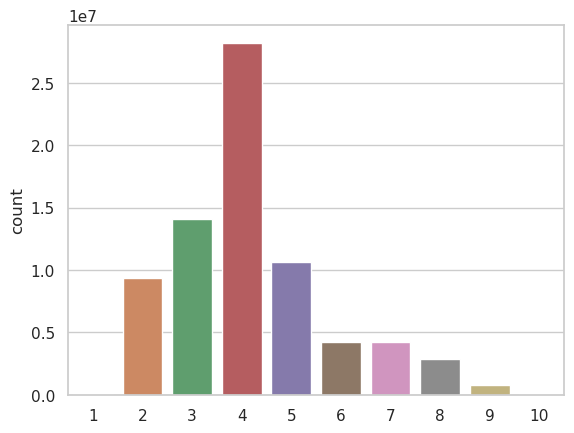

In [19]:
caminos = []
for i in l.keys():
    for j in l[i].keys():
        if l[i][j] != 0:
            caminos.append(l[i][j])

sns.countplot(x=caminos)

print(f"El camino geodésico medio es: {nx.average_shortest_path_length(G):.2f}")

In [20]:
list(nx.connected_components(G))

[{'1143992129762603009',
  '1608175292618625025',
  '1448291396',
  '1295494168974950405',
  '197923170',
  '1661724891022778371',
  '1690789124389605376',
  '2490308016',
  '1180688190975426560',
  '1068415663',
  '1501201021317664768',
  '1715497050517749760',
  '1725798121954045952',
  '1083825689848135680',
  '201829548',
  '1634068285854560256',
  '150483748',
  '1459309100781744130',
  '712942455822409728',
  '747196471976431618',
  '1596512189363494912',
  '1392955557569572865',
  '1698621919493267456',
  '1687430164807102464',
  '1640389560021716994',
  '1185672311103541248',
  '189724293',
  '1646149209479888896',
  '1357352974692016128',
  '1762790268426764288',
  '1624896351744978945',
  '1213456970256019456',
  '1687940719896322049',
  '1352447267601588226',
  '1683680377431371776',
  '1488241184883494915',
  '292357430',
  '1267181615924551682',
  '1447705566541975557',
  '1191847310201896965',
  '633841546',
  '1650272605633499138',
  '1727091180205133826',
  '17086716789

In [21]:
G.number_of_nodes()

8631

In [ ]:
# GRAFICO COMPARACION ERGI CON GRAFICO REAL

# COMPARACION BARABASI

/tmp/ipykernel_10448/1859256054.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


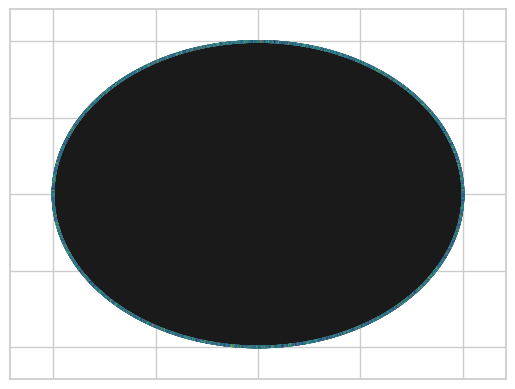

In [25]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


#Calculamos la mejor partición de la red
partition = community_louvain.best_partition(G)

# Dibujamos el grafo
pos = nx.circular_layout(G) # posibles valores alternativos: random, spectral, spiral, circular... (https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html)
# Pintamos los nodos de acuerdo a su partición, o comunidad.
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G,
                       pos,
                       partition.keys(),
                       node_size=1,
                       cmap=cmap,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.show()

In [27]:
cg = nx.community.girvan_newman(G)


In [28]:
top = next(cg)
nextl = next(cg)
sorted(map(sorted, nextl))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pandita/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_10448/3032037895.py", line 2, in <module>
    nextl = next(cg)
            ^^^^^^^^
  File "/home/pandita/anaconda3/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 147, in girvan_newman
    yield _without_most_central_edges(g, most_valuable_edge)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pandita/anaconda3/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 166, in _without_most_central_edges
    edge = most_valuable_edge(G)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/pandita/anaconda3/lib/python3.11/site-packages/networkx/algorithms/community/centrality.py", line 138, in most_valuable_edge
    betweenness = nx.edge_betweenness_centrality(G)
                  ^^^^^^